In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [267]:
df_dados = pd.read_csv('df_total.csv', sep=',')

In [268]:
# Substituir -1 por 'evade' e 1 por 'not evade' na coluna 'status'
df_dados['status'] = df_dados['status'].replace({-1: 'evaded', 1: 'not evaded'})

# SVM

Acurácia do classificador SVM: 0.8529411764705882
Matriz de confusão:
[[104  19]
 [ 11  70]]
Relatório de classificação:
              precision    recall  f1-score   support

      evaded       0.90      0.85      0.87       123
  not evaded       0.79      0.86      0.82        81

    accuracy                           0.85       204
   macro avg       0.85      0.85      0.85       204
weighted avg       0.86      0.85      0.85       204



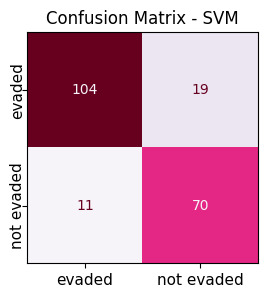

In [269]:
from sklearn.svm import SVC

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Treinar o classificador SVM
classifier = SVC(kernel='linear', C=1)
classifier.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = classifier.predict(X_test)

# Avaliar a precisão do classificador
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do classificador SVM:", accuracy)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Exibir o relatório de classificação
class_report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(class_report)
# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Confusion Matrix - SVM', fontsize=12)
plt.show()

# Regressão Logística 

In [270]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_spli
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
X = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()


# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Criar e treinar o modelo de Regressão Logística com o solver liblinear
model = LogisticRegression(max_iter=2000, solver='liblinear', C=1.0)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Validação cruzada
cv_scores = cross_val_score(model, X, y, cv=5)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

# Exibir o relatório de classificação
class_report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(class_report)
# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Confusion Matrix - Regression Logistic', fontsize=12)
plt.show()

ImportError: cannot import name 'train_test_spli' from 'sklearn.model_selection' (/home/wanessa/.local/lib/python3.10/site-packages/sklearn/model_selection/__init__.py)

# Decision Tree

Matriz de confusão:
[[4 1]
 [0 9]]
Accuracy: 0.9285714285714286
Classification Report:
              precision    recall  f1-score   support

      evaded       1.00      0.80      0.89         5
  not evaded       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



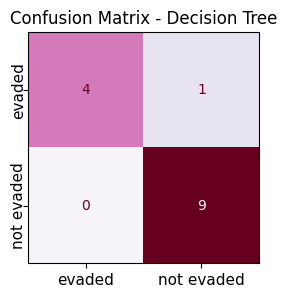

In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
X = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Criar e treinar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Confusion Matrix - Decision Tree', fontsize=12)
plt.show()

# Random Forest

Matriz de confusão:
[[4 1]
 [0 9]]
Acurácia: 0.9285714285714286
Relatório de Classificação:
              precision    recall  f1-score   support

      evaded       1.00      0.80      0.89         5
  not evaded       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



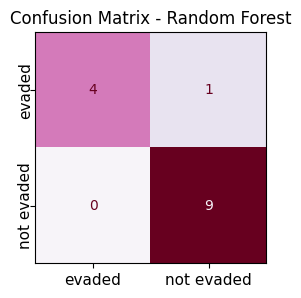

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Treinar o modelo de Random Forests
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(x_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(report)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center',fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Confusion Matrix - Random Forest',fontsize=12)
plt.show()


# Naive Bayes

Matriz de confusão:
[[4 1]
 [1 8]]
Acurácia: 0.8571428571428571
Relatório de Classificação:
              precision    recall  f1-score   support

      evaded       0.80      0.80      0.80         5
  not evaded       0.89      0.89      0.89         9

    accuracy                           0.86        14
   macro avg       0.84      0.84      0.84        14
weighted avg       0.86      0.86      0.86        14



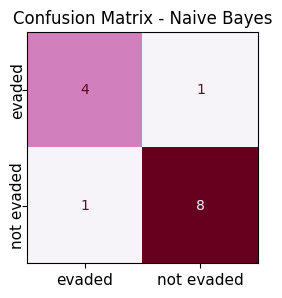

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Treinar o modelo de Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

# Fazer previsões
y_pred = nb_model.predict(x_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(report)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Confusion Matrix - Naive Bayes', fontsize=12)
plt.show()


# K-Nearest Neighbors

Acurácia: 0.8571428571428571
Relatório de Classificação:
              precision    recall  f1-score   support

      evaded       0.80      0.80      0.80         5
  not evaded       0.89      0.89      0.89         9

    accuracy                           0.86        14
   macro avg       0.84      0.84      0.84        14
weighted avg       0.86      0.86      0.86        14

Matriz de Confusão:
[[4 1]
 [1 8]]


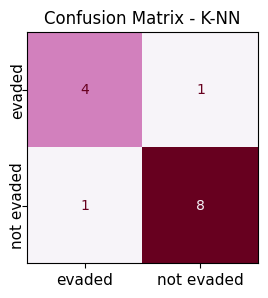

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Treinar o modelo de K-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Fazer previsões
y_pred = knn_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center',fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Confusion Matrix - K-NN', fontsize=12)
plt.show()

# AdaBoost

Acurácia: 0.857
Relatório de Classificação:
              precision    recall  f1-score   support

      evaded       0.80      0.80      0.80         5
  not evaded       0.89      0.89      0.89         9

    accuracy                           0.86        14
   macro avg       0.84      0.84      0.84        14
weighted avg       0.86      0.86      0.86        14

Matriz de Confusão:
[[4 1]
 [1 8]]


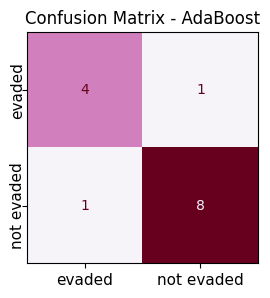

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Treinar o modelo de AdaBoost com o algoritmo SAMME
adaboost_model = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=42)
adaboost_model.fit(x_train, y_train)

# Fazer previsões
y_pred = adaboost_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.3f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Confusion Matrix - AdaBoost', fontsize=12)
plt.show()


# Neural Net

Acurácia: 0.786
Relatório de Classificação:
              precision    recall  f1-score   support

      evaded       1.00      0.40      0.57         5
  not evaded       0.75      1.00      0.86         9

    accuracy                           0.79        14
   macro avg       0.88      0.70      0.71        14
weighted avg       0.84      0.79      0.76        14

Matriz de Confusão:
[[2 3]
 [0 9]]


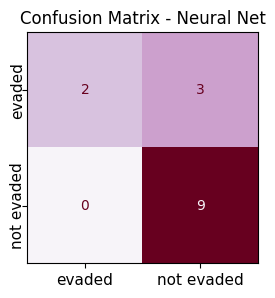

In [ ]:
from sklearn.neural_network import MLPClassifier

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)


# Definir e treinar o modelo de rede neural
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(x_train, y_train)

# Fazer previsões
y_pred = mlp_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.3f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Confusion Matrix - Neural Net', fontsize=12)
plt.show()

# QDA

Acurácia: 0.857
Relatório de Classificação:
              precision    recall  f1-score   support

      evaded       1.00      0.60      0.75         5
  not evaded       0.82      1.00      0.90         9

    accuracy                           0.86        14
   macro avg       0.91      0.80      0.82        14
weighted avg       0.88      0.86      0.85        14

Matriz de Confusão:
[[3 2]
 [0 9]]


/home/wanessa/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


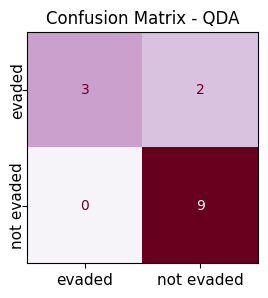

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Treinar o modelo de QDA
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(x_train, y_train)

# Fazer previsões
y_pred = qda_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.3f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Confusion Matrix - QDA', fontsize=12)
plt.show()

# Gaussian Process

Acurácia: 0.929
Relatório de Classificação:
              precision    recall  f1-score   support

      evaded       1.00      0.80      0.89         5
  not evaded       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14

Matriz de Confusão:
[[4 1]
 [0 9]]


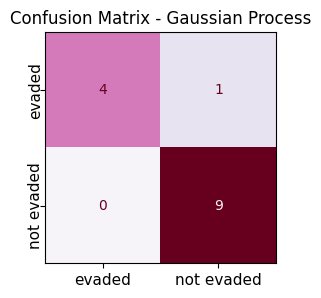

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Definir o modelo de Gaussian Process com um kernel RBF (Radial Basis Function)
kernel = 1.0 * RBF(1.0)
gpc_model = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Treinar o modelo
gpc_model.fit(x_train, y_train)

# Fazer previsões
y_pred = gpc_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.3f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)

# Exibir uma versão mais visual da matriz de confusão sem a colorbar
labels = np.unique(y_test)  # Obter os rótulos únicos
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap=plt.cm.PuRd, ax=ax, colorbar=False)
plt.yticks(rotation=90, ha='center', va='center', fontsize=11)
plt.xticks(fontsize=11)
# Remover os rótulos dos eixos
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Confusion Matrix - Gaussian Process', fontsize=12)
plt.show()
